X shape = (569, 30), y shape = (569,)
iteration = 0, cost = 4.036579952908354
iteration = 10, cost = 2.06215349482189
iteration = 20, cost = 1.4011360771211447
iteration = 30, cost = 1.0145354618179354
iteration = 40, cost = 0.7634935317481859
iteration = 50, cost = 0.5956565910982766
iteration = 60, cost = 0.4821778295858272
iteration = 70, cost = 0.40495901541014245
iteration = 80, cost = 0.35216523672147654
iteration = 90, cost = 0.3159306480957358
-----------------------------------------------------------------------------------------------------------------------------
Final model : 
w = 
[-0.34880274 -0.0700264   0.06792923 -0.32798246 -0.07902649 -0.10298075
 -0.35604631 -0.07259356 -0.10237177  0.27193676 -0.11217021  0.03473794
 -0.43001738 -0.1649085  -0.13473     0.19993012 -0.01328373  0.00582854
  0.1934242  -0.06115267 -0.16961491 -0.29769133 -0.14055114 -0.41510423
 -0.12526195 -0.19586019  0.07230017 -0.47020975 -0.19556879 -0.2545547 ]
b = 0.42033995033333
accuracy = 

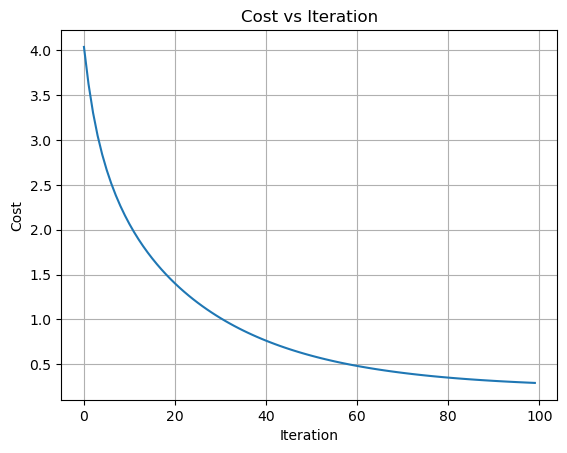

In [118]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 載入資料
data = load_breast_cancer()
X = data.data
y = data.target
print(f"X shape = {X.shape}, y shape = {y.shape}")

# features scaling using Z-score normalization
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# 查看資料說明與 shape
# print(data.DESCR)
# 可以用 pandas DataFrame 方便觀察
#  df = pd.DataFrame(X, columns=data.feature_names)
#  df["target"] = y
# print(df.head())

m, n = X.shape
lambda_ = 100
learning_rate = 0.1
iteration = 100
w = np.random.randn(30,)
b = np.random.randn()
costs = []

# if z<0 use np.exp(z)/(np.exp(z)+1) to avoid overflow
def sigmoid(w, X, b):
    z = np.dot(X, w) + b
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z)/(np.exp(z)+1))
    
def compute_cost(w, b, X, y, lambda_):
    m, n = X.shape
    return (-1/m)*np.sum(y * np.log(sigmoid(w, X, b)) + (1-y) * np.log(1-sigmoid(w, X, b))) \
    + (lambda_/(2*m) * np.sum(w**2))
    
for i in range(iteration):
    y_pred = sigmoid(w, X, b)
    cost = compute_cost(w, b, X, y, lambda_)
    costs.append(cost)
    w -= learning_rate * ((1/m) * np.dot(X.T, (y_pred - y)) + (lambda_/m) * w)
    b -= learning_rate * ((1/m) * np.sum(y_pred - y))
    if i % (iteration//10) == 0:
        print(f"iteration = {i}, cost = {cost}")
        
def predict(w, X, b):
    return (sigmoid(w, X, b) >= 0.5).astype(int)
    
accuracy = np.mean(predict(w, X, b) == y)

print(f"-----------------------------------------------------------------------------------------------------------------------------")
print(f"Final model : ")
print(f"w = \n{w}")
print(f"b = {b}")
print(f"accuracy = {precision*100} %")

# plot cost vs iteration
plt.plot(range(iteration), costs)
plt.title("Cost vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

